# A baseline ML models for comparison

## 1. Load the data

In [45]:
# Determine which data to load. Set to True to load the data. PICK ONLY ONE

ML_DATASET_LOAD = True
DNN_DATASET_LOAD = False

In [46]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [47]:
dataset_path = "../datasets/Edge-IIoT/"

if ML_DATASET_LOAD:
    df = pd.read_pickle(dataset_path + "Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.pkl")   
else:
    df = pd.read_pickle(dataset_path + "Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.pkl")

In [48]:
# Show the first 5 rows of the dataset
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [49]:
# Show the different attack labels
print(df['Attack_type'].value_counts())

# Show the shape and size of the dataset
print(f"\nDataframe shape: {df.shape}")

Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: Attack_type, dtype: int64

Dataframe shape: (157800, 63)


### Data Preparation - Drop data (Columns, duplicated rows, NAN, Null..)

In [50]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

# Compute the number of missing values (NaN or null) in each column of a pandas DataFrame object named df. If any of them are non-zero, assert an error.
assert df.isnull().sum().sum() == 0


In [51]:
# Show the shape and size of the dataset
print(f"\nDataframe shape: {df.shape}")

# Show the first 5 rows of the dataset
df.head()


Dataframe shape: (152196, 48)


,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.request.method,http.referer,http.request.version,http.response,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
109488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
83579,0.0,0.0,0.0,0.0,0.0,277.0,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Vulnerability_scanner
83950,0.0,0.0,0.0,0.0,0.0,36.0,GET,0,HTTP/1.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Vulnerability_scanner
10917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Ransomware
101430,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,XSS


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152196 entries, 109488 to 95422
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   arp.opcode                 152196 non-null  float64
 1   arp.hw.size                152196 non-null  float64
 2   icmp.checksum              152196 non-null  float64
 3   icmp.seq_le                152196 non-null  float64
 4   icmp.unused                152196 non-null  float64
 5   http.content_length        152196 non-null  float64
 6   http.request.method        152196 non-null  object 
 7   http.referer               152196 non-null  object 
 8   http.request.version       152196 non-null  object 
 9   http.response              152196 non-null  float64
 10  http.tls_port              152196 non-null  float64
 11  tcp.ack                    152196 non-null  float64
 12  tcp.ack_raw                152196 non-null  float64
 13  tcp.checksum             

### Step 4 : Categorical data encoding (Dummy Encoding):

EG. Takes a product category and converts it to a binary vector
```
   customer_id product_category  apparel  books  electronics
0            1     electronics        0      0            1
1            2          apparel       1      0            0
2            3            books       0      1            0
3            4     electronics        0      0            1
4            5          apparel       1      0            0
```



In [53]:
def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

Grab the Attack type and attack label

In [54]:
# Creating a dictionary of Types
attacks = {'Normal': 0 ,'Backdoor' :1, 'DDoS_HTTP':2,  'DDoS_ICMP':3, 'DDoS_TCP':4, 'DDoS_UDP':5, 
           'Fingerprinting':6, 'MITM':7, 'Password':8, 'Port_Scanning':9, 'Ransomware':10, 
           'SQL_injection':11, 'Uploading':12, 'Vulnerability_scanner':13, 'XSS':14}

df['Attack_type'] = df['Attack_type'].map(attacks)


In [55]:
# Save the attack type and attack label
attack_type = df.pop('Attack_type')
attack_label = df.pop('Attack_label')

In [56]:
#print out mapping of attack types values dictionary to descriptions
# Get the count of each attack type
attack_counts = attack_type.map({v: k for k, v in attacks.items()}).value_counts()

for attack, code in attacks.items():
    count = attack_counts[attack] if attack in attack_counts else 0
    print(f'{code} - {attack} \t\t\t- {count}')


0 - Normal 			- 24101
1 - Backdoor 			- 9865
2 - DDoS_HTTP 			- 10495
3 - DDoS_ICMP 			- 13096
4 - DDoS_TCP 			- 10247
5 - DDoS_UDP 			- 14498
6 - Fingerprinting 			- 853
7 - MITM 			- 358
8 - Password 			- 9972
9 - Port_Scanning 			- 8921
10 - Ransomware 			- 9689
11 - SQL_injection 			- 10282
12 - Uploading 			- 10214
13 - Vulnerability_scanner 			- 10062
14 - XSS 			- 9543


Scaling of features

In [57]:
# Scaling of features to fit within defined range
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaled_features = StandardScaler().fit_transform(df.values)

# Label Preprocessing
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# label_n = le.fit_transform(attack_type.values)

label_n = attack_type.values


In [58]:
# Test / train split
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(scaled_features, label_n, stratify=label_n, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, label_n, stratify=label_n, test_size=0.2, random_state=42)
print ("Train:", X_train.shape, y_train.shape)
print ("Test:", X_test.shape, y_test.shape)

Train: (121756, 74) (121756,)
Test: (30440, 74) (30440,)


Show the size of the Train/Test counts for the different attack types
These outputs should match Table 11 in the paper (for ML dataset)

In [59]:
# In the X_train data, count the number attacks of each type
unique, counts = np.unique(y_train, return_counts=True)
print("Train: ", dict(zip(unique, counts)))

# Do the same for the test data
unique, counts = np.unique(y_test, return_counts=True)
print("Test: ", dict(zip(unique, counts)))

Train:  {0: 19281, 1: 7892, 2: 8396, 3: 10477, 4: 8198, 5: 11598, 6: 682, 7: 286, 8: 7978, 9: 7137, 10: 7751, 11: 8225, 12: 8171, 13: 8050, 14: 7634}
Test:  {0: 4820, 1: 1973, 2: 2099, 3: 2619, 4: 2049, 5: 2900, 6: 171, 7: 72, 8: 1994, 9: 1784, 10: 1938, 11: 2057, 12: 2043, 13: 2012, 14: 1909}


In [61]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(121756, 74)
(30440, 74)
(121756,)
(30440,)


We now have our data in a typical ***X_train, X_test, y_train, y_test*** format, where we can then deploy centralised and decentralised ML models.

## 2. Centralised Machine Learning Models

### 2.1 Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
%%time
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

CPU times: total: 891 ms
Wall time: 893 ms


DecisionTreeClassifier()

In [64]:
dt_score = dTree_clf.score(X_test, y_test)
print("Accuracy of DT Model::", dt_score)

Accuracy of DT Model:: 0.9276938239159002


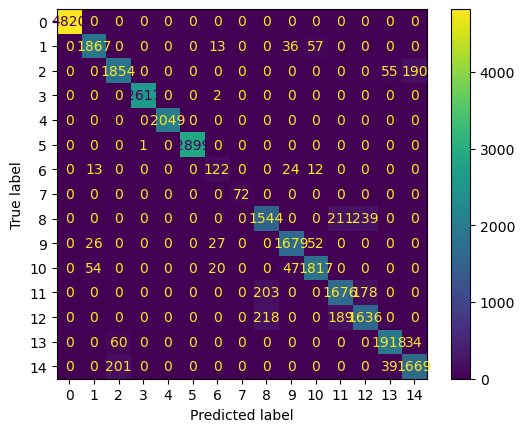

In [65]:
dt_predictions = dTree_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_cm = confusion_matrix(y_test, dt_predictions, labels=dTree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dTree_clf.classes_)
disp.plot()
plt.show()

In [66]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, dt_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, dt_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, dt_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, dt_predictions, average=None, labels=np.unique(y_test)) )

Macro: (0.9062911335455756, 0.9092031501590274, 0.9076787641042533, None)
Micro: (0.9276938239159002, 0.9276938239159002, 0.9276938239159002, None)
Weighted: (0.9278069330676049, 0.9276938239159002, 0.927738428782555, None)
Per-label: (array([1.        , 0.95255102, 0.87659574, 0.99961803, 1.        ,
       1.        , 0.66304348, 1.        , 0.78575064, 0.94008959,
       0.9375645 , 0.80732177, 0.79688261, 0.95328032, 0.88166931]), array([1.        , 0.94627471, 0.88327775, 0.99923635, 1.        ,
       0.99965517, 0.71345029, 1.        , 0.77432297, 0.9411435 ,
       0.9375645 , 0.8147788 , 0.80078316, 0.95328032, 0.87427973]), array([1.        , 0.94940249, 0.87992406, 0.99942715, 1.        ,
       0.99982756, 0.68732394, 1.        , 0.77999495, 0.94061625,
       0.9375645 , 0.81103315, 0.79882813, 0.95328032, 0.87795897]), array([4820, 1973, 2099, 2619, 2049, 2900,  171,   72, 1994, 1784, 1938,
       2057, 2043, 2012, 1909], dtype=int64))


In [67]:
print(confusion_matrix(y_test, dt_predictions))

[[4820    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0 1867    0    0    0    0   13    0    0   36   57    0    0    0
     0]
 [   0    0 1854    0    0    0    0    0    0    0    0    0    0   55
   190]
 [   0    0    0 2617    0    0    2    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 2049    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    1    0 2899    0    0    0    0    0    0    0    0
     0]
 [   0   13    0    0    0    0  122    0    0   24   12    0    0    0
     0]
 [   0    0    0    0    0    0    0   72    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0 1544    0    0  211  239    0
     0]
 [   0   26    0    0    0    0   27    0    0 1679   52    0    0    0
     0]
 [   0   54    0    0    0    0   20    0    0   47 1817    0    0    0
     0]
 [   0    0    0    0    0    0    0    0  203    0    0 1676  178    0
     0]
 [   0    0    0    0    0    0    0    

In [68]:
print("DT Classification Report")
print(classification_report(y_test, dt_predictions))


DT Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4820
           1       0.95      0.95      0.95      1973
           2       0.88      0.88      0.88      2099
           3       1.00      1.00      1.00      2619
           4       1.00      1.00      1.00      2049
           5       1.00      1.00      1.00      2900
           6       0.66      0.71      0.69       171
           7       1.00      1.00      1.00        72
           8       0.79      0.77      0.78      1994
           9       0.94      0.94      0.94      1784
          10       0.94      0.94      0.94      1938
          11       0.81      0.81      0.81      2057
          12       0.80      0.80      0.80      2043
          13       0.95      0.95      0.95      2012
          14       0.88      0.87      0.88      1909

    accuracy                           0.93     30440
   macro avg       0.91      0.91      0.91     30440
w

### 2.2 Random Forest Classifier

In [69]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [70]:
%%time
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

CPU times: total: 17.6 s
Wall time: 17.6 s


RandomForestClassifier(random_state=42)

Accuracy of Random Forest model: 0.9300919842312746


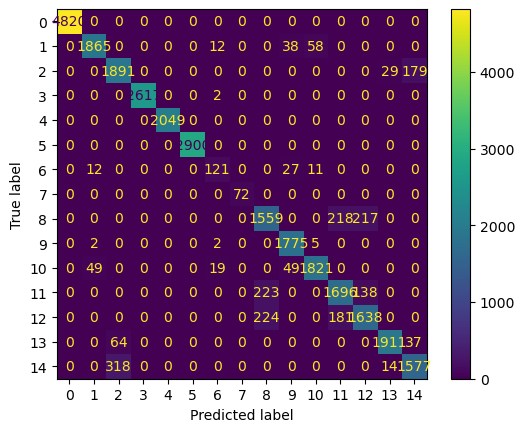

In [71]:
rf_score = rf.score(X_test, y_test)
print("Accuracy of Random Forest model:", rf_score)

rf_predictions = rf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_cm = confusion_matrix(y_test, rf_predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
disp.plot()

plt.show()

In [72]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4820
           1       0.97      0.95      0.96      1973
           2       0.83      0.90      0.87      2099
           3       1.00      1.00      1.00      2619
           4       1.00      1.00      1.00      2049
           5       1.00      1.00      1.00      2900
           6       0.78      0.71      0.74       171
           7       1.00      1.00      1.00        72
           8       0.78      0.78      0.78      1994
           9       0.94      0.99      0.97      1784
          10       0.96      0.94      0.95      1938
          11       0.81      0.82      0.82      2057
          12       0.82      0.80      0.81      2043
          13       0.98      0.95      0.96      2012
          14       0.88      0.83      0.85      1909

    accuracy                           0.93     30440
   macro avg       0.92      0.91      0.91     30440
weighted avg       0.93   

### 2.3 KNN Classifier

In [91]:
# Perform KNN classification on the data
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

In [92]:
%%time
# Fit the classifier to the training data
knn.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 23.9 ms


KNeighborsClassifier(n_neighbors=7)

In [93]:
# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data
knn_predictions = knn.predict(X_test)

# Compute the accuracy of the KNN classifier on the test data
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy of KNN model:", knn_accuracy)

print(classification_report(y_test, knn_predictions))

Accuracy of KNN model: 0.8103482260183968
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4820
           1       0.97      0.94      0.95      1973
           2       0.73      0.73      0.73      2099
           3       1.00      0.99      0.99      2619
           4       0.76      0.79      0.77      2049
           5       1.00      1.00      1.00      2900
           6       0.76      0.68      0.72       171
           7       0.97      1.00      0.99        72
           8       0.44      0.49      0.46      1994
           9       0.73      0.74      0.74      1784
          10       0.95      0.95      0.95      1938
          11       0.48      0.51      0.49      2057
          12       0.60      0.51      0.55      2043
          13       0.87      0.85      0.86      2012
          14       0.63      0.64      0.64      1909

    accuracy                           0.81     30440
   macro avg       0.79      0.79     

### 2.4 SVM Classifier

In [76]:
from sklearn.svm import SVC

# Create an SVM object
svm = SVC(kernel='linear')

In [77]:

%%time
# Train the SVM on the training data
svm.fit(X_train, y_train)

CPU times: total: 10min 49s
Wall time: 10min 50s


SVC(kernel='linear')

In [78]:
# Predict the labels of the test data
svm_predications = svm.predict(X_test)

# Compute the accuracy of the SVM on the test data
svm_accuracy = accuracy_score(y_test, svm_predications)
print("Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_predications))


Accuracy: 0.7753285151116951
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4820
           1       0.63      0.77      0.69      1973
           2       0.89      0.63      0.74      2099
           3       1.00      0.99      0.99      2619
           4       1.00      0.58      0.73      2049
           5       1.00      1.00      1.00      2900
           6       0.78      0.67      0.72       171
           7       1.00      1.00      1.00        72
           8       0.60      0.25      0.35      1994
           9       0.63      0.99      0.77      1784
          10       0.68      0.49      0.57      1938
          11       0.41      0.82      0.54      2057
          12       0.65      0.37      0.47      2043
          13       0.96      0.86      0.91      2012
          14       0.63      0.90      0.74      1909

    accuracy                           0.78     30440
   macro avg       0.79      0.75      0.75     304

### 2.5 Multi Layer Perception (DNN)

In [79]:
from sklearn.neural_network import MLPClassifier

In [80]:
%%time
mlp_clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
mlp_score = mlp_clf.score(X_test, y_test)

CPU times: total: 11min 21s
Wall time: 1min 53s


In [95]:
print("Accuracy of MLP (DNN) model:", mlp_score)


Accuracy of MLP (DNN) model: 0.8241458607095926


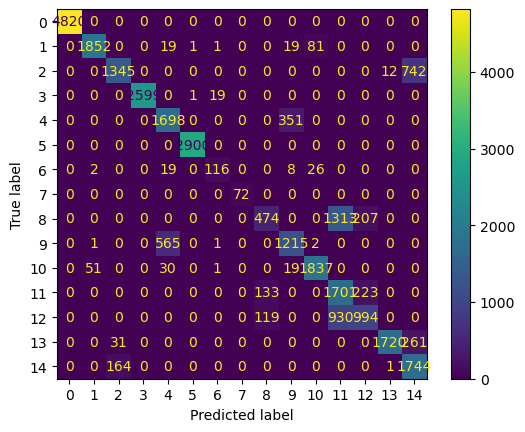

In [82]:
mlp_predictions = mlp_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mlp_cm = confusion_matrix(y_test, mlp_predictions, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=mlp_clf.classes_)
disp.plot()
plt.show()

In [83]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, mlp_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, mlp_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, mlp_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, mlp_predictions, average=None, labels=np.unique(y_test)) )

# print classification report
print("MLP Classification Report: ")
print(classification_report(y_test, mlp_predictions))

Macro: (0.8347116878105465, 0.8018291785435709, 0.802272887702315, None)
Micro: (0.8241458607095926, 0.8241458607095926, 0.8241458607095926, None)
Weighted: (0.8473626718994867, 0.8241458607095926, 0.8204070247574565, None)
Per-label: (array([1.        , 0.97166842, 0.87337662, 1.        , 0.72844273,
       0.99931082, 0.84057971, 1.        , 0.65289256, 0.75372208,
       0.94398767, 0.43128803, 0.69803371, 0.99249856, 0.63487441]), array([1.        , 0.93867207, 0.64078132, 0.9923635 , 0.82869693,
       1.        , 0.67836257, 1.        , 0.23771314, 0.68105381,
       0.94788442, 0.82693243, 0.4865394 , 0.85487078, 0.91356731]), array([1.        , 0.95488528, 0.73921407, 0.99616711, 0.77534247,
       0.99965529, 0.75080906, 1.        , 0.34852941, 0.7155477 ,
       0.94593203, 0.56690552, 0.5734064 , 0.91855808, 0.74914089]), array([4820, 1973, 2099, 2619, 2049, 2900,  171,   72, 1994, 1784, 1938,
       2057, 2043, 2012, 1909], dtype=int64))
MLP Classification Report: 
        

In [84]:
print (len(mlp_clf.coefs_))
print (mlp_clf.coefs_[0].shape)
print (mlp_clf.coefs_[1].shape)
print (len(mlp_clf.intercepts_))
print (mlp_clf.intercepts_[0].shape)
print (mlp_clf.intercepts_[1].shape)
print (mlp_clf.n_layers_)
print (type(mlp_clf.coefs_[0]))

2
(74, 100)
(100, 15)
2
(100,)
(15,)
3
<class 'numpy.ndarray'>


### 2.7 Extreme Gradient Boosting

In [85]:
# https://www.geeksforgeeks.org/xgboost/
# https://www.section.io/engineering-education/machine-learning-with-xgboost-and-scikit-learn/

!pip install xgboost
import xgboost as xgb

In [86]:
%%time
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)


CPU times: total: 15min 1s
Wall time: 1min 24s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [87]:
#predictions = xgb_classifier.predict(X_test)
#print("Accuracy of XGB Model::",accuracy_score(y_test,predictions))

xgb_score = xgb_classifier.score(X_test, y_test)
print("Accuracy of XGB model:", xgb_score)

# print classification report
xgb_predictions = xgb_classifier.predict(X_test)


Accuracy of XGB model: 0.9483245729303548


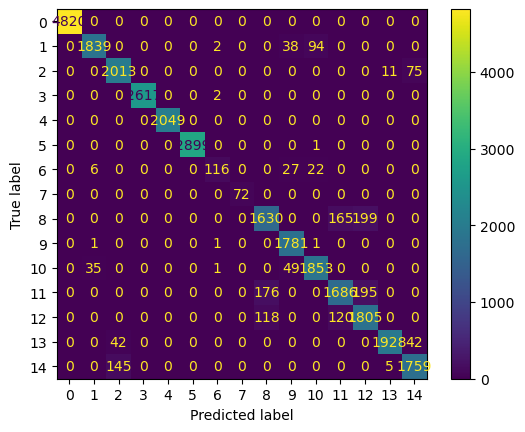

In [88]:
xgb_predictions = xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
xgb_cm = confusion_matrix(y_test, xgb_predictions, labels=xgb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_classifier.classes_)
disp.plot()
plt.show()


In [89]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, xgb_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, xgb_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, xgb_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, xgb_predictions, average=None, labels=np.unique(y_test)) )

print("XGB Classification Report: ")
print(classification_report(y_test, xgb_predictions))

Macro: (0.945086125275984, 0.9282064432818211, 0.9348494742212619, None)
Micro: (0.9483245729303548, 0.9483245729303548, 0.9483245729303548, None)
Weighted: (0.9488165404998968, 0.9483245729303548, 0.9481716009992247, None)
Per-label: (array([1.        , 0.97767145, 0.915     , 1.        , 1.        ,
       1.        , 0.95081967, 1.        , 0.84719335, 0.93984169,
       0.94013191, 0.85540335, 0.82082765, 0.99176955, 0.93763326]), array([1.        , 0.93208312, 0.95902811, 0.99923635, 1.        ,
       0.99965517, 0.67836257, 1.        , 0.81745236, 0.99831839,
       0.95614035, 0.81964025, 0.88350465, 0.9582505 , 0.92142483]), array([1.        , 0.95433316, 0.93649686, 0.99961803, 1.        ,
       0.99982756, 0.79180887, 1.        , 0.83205717, 0.96819788,
       0.94806856, 0.83714002, 0.85101367, 0.97472194, 0.92945839]), array([4820, 1973, 2099, 2619, 2049, 2900,  171,   72, 1994, 1784, 1938,
       2057, 2043, 2012, 1909], dtype=int64))
XGB Classification Report: 
        

# Recap

Expected output from Figure 5 for 15 class performance:

 - DT = 67.11%
 - RF = 80.83%
 - KNN = 79.18%
 - SVM = 77.61%
 - DNN = 94.67%

In [96]:
print("Accuracy of DT Model::", dt_score)
print("Accuracy of Random Forest model:", rf_score)
print("Accuracy of KNN model:", knn_accuracy)
print("Accuracy of SVM model:", svm_accuracy)
print("Accuracy of MLP (DNN) model:", mlp_score)
print("Accuracy of XGB model:", xgb_score)


Accuracy of DT Model:: 0.9276938239159002
Accuracy of Random Forest model: 0.9300919842312746
Accuracy of KNN model: 0.8103482260183968
Accuracy of SVM model: 0.7753285151116951
Accuracy of MLP (DNN) model: 0.8241458607095926
Accuracy of XGB model: 0.9483245729303548


In [1]:
DT = 67.11
RF = 80.83
KNN = 79.18
SVM = 77.61
DNN = 94.67

# Calculate and print the difference between the expected values and the actual values
diff_dt = dt_score - DT
diff_rf = rf_score - RF
diff_knn = knn_accuracy - KNN
diff_svm = svm_accuracy - SVM
diff_dnn = mlp_score - DNN

print(f"\nDifference between expected and actual values:\nDT: {diff_dt}\nRF: {diff_rf}\nKNN: {diff_knn}\nSVM: {diff_svm}\nDNN: {diff_dnn}")

NameError: name 'dt_score' is not defined